#Women in Data Science
##Week 2 - Data Understanding

###Stephen Redmond
Enterprise Insight Studio Lead

In [0]:
# Connect to my Google Drive
from google.colab import drive



In [0]:
!ls '/content/drive/My Drive/WIDS'

#Loading the DataFrame from a CSV file using pandas

In [0]:
# import the pandas library
# Traditionally, this is loaded and named as "pd"
import pandas as pd

# Titanic data from https://www.kaggle.com/c/titanic/data
# Load the Titanic data file from my Google Drive
df = pd.read_csv('/content/drive/My Drive/WIDS/titanic/train.csv')


# Data Dictionary
| Variable | Definition                                 | Key                                            |
|----------|--------------------------------------------|------------------------------------------------|
| survival | Survival                                   | 0 = No, 1 = Yes                                |
| pclass   | Ticket class                               | 1 = 1st, 2 = 2nd, 3 = 3rd                      |
| sex      | Sex                                        |                                                |
| Age      | Age in years                               |                                                |
| sibsp    | # of siblings / spouses aboard the Titanic |                                                |
| parch    | # of parents / children aboard the Titanic |                                                |
| ticket   | Ticket number                              |                                                |
| fare     | Passenger fare                             |                                                |
| cabin    | Cabin number                               |                                                |
| embarked | Port of Embarkation                        | C = Cherbourg, Q = Queenstown, S = Southampton |

In [117]:
# Have a quick look
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [118]:
# Summary stats
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [119]:
# And the non-numeric fields
df[["Name","Sex","Ticket","Cabin","Embarked"]].describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Marechal, Mr. Pierre",male,347082,G6,S
freq,1,577,7,4,644


In [0]:
# Some of these fields are less than useful:
# - Cabin has many missing values
# - Name, Ticket and PassengerId have too many unique values
df = df.drop(columns = ['Cabin','Name','Ticket','PassengerId'])

# Contingency Tables
## Multivariate cross-tables
Shows the number of values in each category.



In [121]:
# Single category - we saw this last week!
df['Pclass'].value_counts(dropna = False)


3    491
1    216
2    184
Name: Pclass, dtype: int64

In [122]:
df['Sex'].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

In [123]:
# Multiple categories - using crosstable
df_crosstab = pd.crosstab(df['Pclass'], df['Sex'], margins = False)
df_crosstab

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [124]:
df_crosstab = pd.crosstab(df['Survived'], df['Sex'], margins = False)
df_crosstab

Sex,female,male
Survived,,
0,81,468
1,233,109


In [125]:
df_crosstab = pd.crosstab(df['Survived'], df['Pclass'], margins = False)
df_crosstab

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


# Statistical tests with scipy
**scipy** is one of the fundamental Python libraries

There are several extensions to scipy, known as "kits" or "scikits".

The most famous is **scikit-learn** (which we will come across!)

In [126]:
# Compute the chi-square statistic and p-value for the hypothesis test 
# of independence of the observed frequencies in the contingency table,
# e.g. are class and survival independent
from scipy.stats import chi2_contingency

chi2_contingency(df_crosstab)

# returns:
#   chi2
#   p-value
#   degrees of freedom
#   array of expected values

(102.88898875696056,
 4.549251711298793e-23,
 2,
 array([[133.09090909, 113.37373737, 302.53535354],
        [ 82.90909091,  70.62626263, 188.46464646]]))

# Scatter plots
We have seen these before - very useful for visualising relationships in data

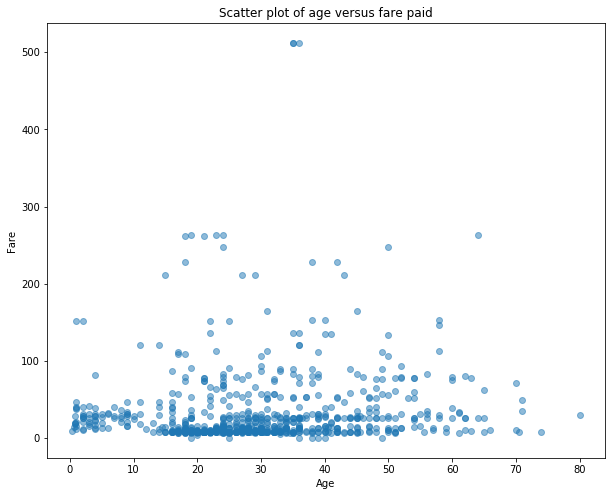

In [127]:
# remember the "magic" - using % in Jupyter notebooks
%matplotlib inline
import matplotlib.pyplot as plt # traditionally "plt"

#Name columns
x = df['Age']
y = df['Fare']
#Plot graphs
plt.figure(figsize=(10,8))
plt.scatter(x, y, alpha=0.5)  # alpha is the level of transparency (0=invisible, 1=fully opaque)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Scatter plot of age versus fare paid')
plt.show()

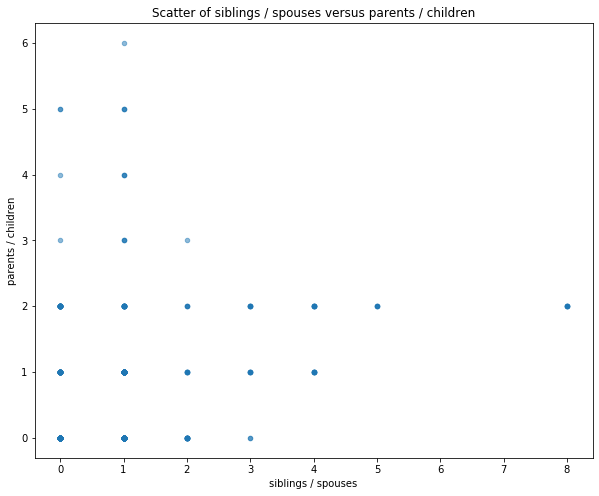

In [128]:
# pandas DataFrame.plot lets us do all that in one!
df.plot(kind = "scatter", 
        x = "SibSp", 
        y = "Parch", 
        title = "Scatter of siblings / spouses versus parents / children",
        figsize=(10,8),
        alpha = 0.5).set(xlabel="siblings / spouses", ylabel="parents / children")
        
plt.show()

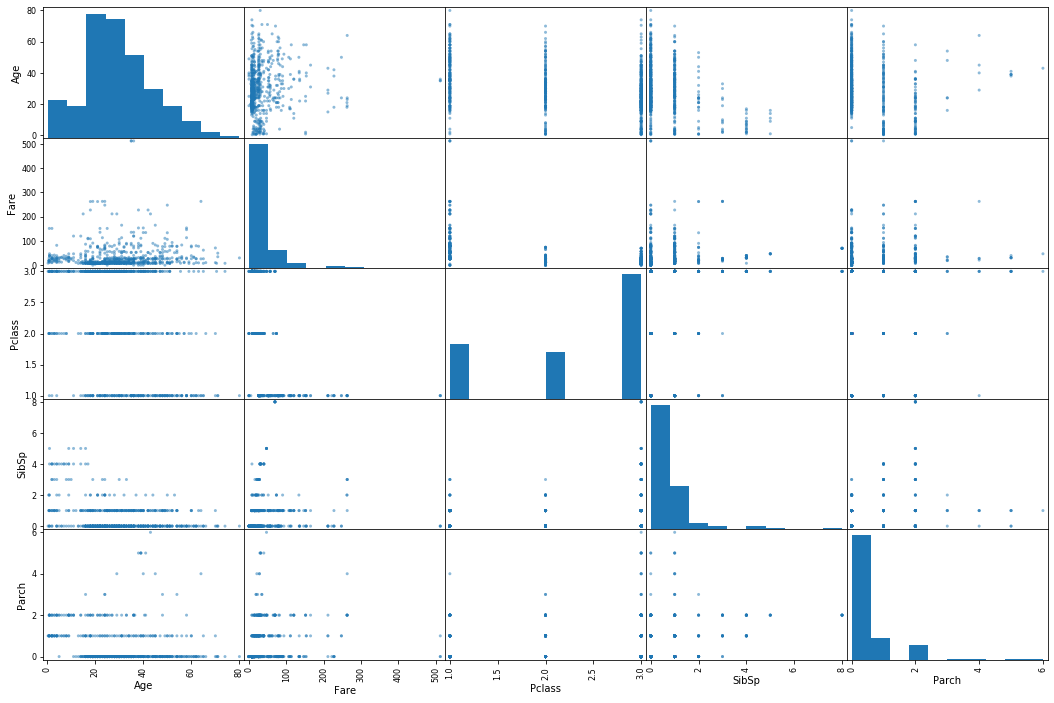

In [129]:
# we also saw the scatter matrix before
from pandas.plotting import scatter_matrix
attributes = ["Age", "Fare", "Pclass", "SibSp", "Parch"]
scatter_matrix(df[attributes], figsize=(18,12))
plt.show()

# Check missing values

In [130]:
df["Embarked"].value_counts(dropna = False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [0]:
# The Embarked field has 2 missing - let's just assume it was Southampton
df["Embarked"].fillna("S", inplace=True)


In [132]:
df["Age"].value_counts(dropna = False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

In [0]:
# Age has NaN values ... what should we do?
df['Age'].fillna(df['Age'].mode()[0], inplace=True)

# Starting with scikit-learn
## A useful "add on" to scipy 😊
We'll have a look at some useful initial uses of sklearn.

For example, splitting a dataset into training and test (why would we do this?)

In [0]:
from sklearn.model_selection import train_test_split

train_X, test_X = train_test_split(df, test_size = 0.2) 


In [135]:
train_X.shape

(712, 8)

In [136]:
test_X.shape

(179, 8)

In [137]:
X = pd.get_dummies(train_X[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]],drop_first=True) 
y = train_X["Survived"]
X

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
588,3,22.0,0,0,8.0500,1,0,1
834,3,18.0,0,0,8.3000,1,0,1
388,3,24.0,0,0,7.7292,1,1,0
531,3,24.0,0,0,7.2292,1,0,0
9,2,14.0,1,0,30.0708,0,0,0
...,...,...,...,...,...,...,...,...
49,3,18.0,1,0,17.8000,0,0,1
871,1,47.0,1,1,52.5542,0,0,1
391,3,21.0,0,0,7.7958,1,0,1
241,3,24.0,1,0,15.5000,0,1,0


In [0]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

dt = dt.fit(X, y)

In [0]:
#plt.figure(figsize=(100,100))
#tree.plot_tree(dt)
#plt.show()

In [0]:
X_test = pd.get_dummies(test_X[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]],drop_first=True) #.to_numpy()
y_test = test_X["Survived"]

In [0]:
y_pred = dt.predict(X_test)

In [141]:
y_pred

array([0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0])

In [142]:
# Use crosstab to display our results
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,89,13,102
1,30,47,77
All,119,60,179


In [143]:
# Calcualte F1 score: F1 = 2 * (precision * recall) / (precision + recall)
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.6861313868613139

# Feature Engineering
## Adding new features based on existing ones


In [144]:
# Create a new feature called FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] 
df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).agg('mean')

,FamilySize,Survived
0,0,0.303538
1,1,0.552795
2,2,0.578431
3,3,0.724138
4,4,0.200000
5,5,0.136364
6,6,0.333333
7,7,0.000000
8,10,0.000000


In [0]:
# Create a new feature called IsAlone, based on FamilySize
df['IsAlone'] = 0
df.loc[df['FamilySize'] == 0, 'IsAlone'] = 1

In [146]:
# Retrain my models
train_X, test_X = train_test_split(df, test_size = 0.2) 
X = pd.get_dummies(train_X[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","FamilySize","IsAlone"]],drop_first=True) 
y = train_X["Survived"]
dt = dt.fit(X, y)
X_test = pd.get_dummies(test_X[["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","FamilySize","IsAlone"]],drop_first=True) #.to_numpy()
y_test = test_X["Survived"]
y_pred = dt.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,93,11,104
1,21,54,75
All,114,65,179


In [147]:
f1_score(y_test, y_pred)

0.7714285714285715

# Feature importance
## Which features have most impact on the target variable

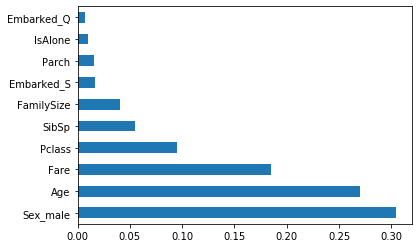

In [148]:
feat_importances = pd.Series(dt.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [149]:
# Retrain my models with less features
train_X, test_X = train_test_split(df, test_size = 0.2) 
X = pd.get_dummies(train_X[["Pclass","Sex","Age","Fare","FamilySize"]],drop_first=True) 
y = train_X["Survived"]
dt = dt.fit(X, y)
X_test = pd.get_dummies(test_X[["Pclass","Sex","Age","Fare","FamilySize"]],drop_first=True) #.to_numpy()
y_test = test_X["Survived"]
y_pred = dt.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,95,18,113
1,12,54,66
All,107,72,179


In [150]:
f1_score(y_test, y_pred)

0.7826086956521738